In [1]:
# Agenda
# A banking institution requires actionable insights from the perspective of Mortgage-Backed Securities, 
# Geographic Business Investment and Real Estate Analysis for USA

# Task in hand
# Identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate
# Create a model to predict the potential demand in dollars amount of loan for each of the region in the USA

# Credentials
# kasham1991@gmail.com | Karan Sharma

In [2]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import time
import random
from math import *
import operator

In [3]:
# Loading the datasets

train = pd.read_csv("C:\\Datasets\\loan_train.csv")
test = pd.read_csv("C:\\Datasets\\loan_test.csv")

In [4]:
# Looking at the basics of the data

print("Columns of train data")
print("---------------------")
print(list(train.columns))
print("---------------------")
print("Columns of test data")
print("---------------------")
print(list(test.columns))

#len(train)
#len(test)

Columns of train data
---------------------
['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'ma

In [5]:
# Both the datasets have significant Nan values and categorical values
# All values in blockid are NaN or 0
# UID is unique identification number

train.head()
train.info()
train.describe()
#test.head()
#test.info
#test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074018    -65.379332  1.039510e+11   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27115.000000       27115.000000      27115.000000   
mean   ...        40.319803          40.355099         22.178745   
std    ...         5.886317           8.039585          2.540257   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.892050          34.916670         21.312135   
50%    ...        40.373320          40.583330         22.514410   
75%    ...        43.567120          45.416670         23.575260   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27115.000000        27115.000000  27053.000000   
mean                 544.238432         2208.761903      0.640434   
std                  283.546896         1089.316999      0.226640   
min                    0.664700            2.000000      0.000000   
25%                  355.995825         1471.000000      0.502780   
50%                  503.643890         2066.000000      0.690840   
75%                  680.275055         2772.000000      0.817460   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27130.000000  27130.000000  27130.000000  27130.000000  
mean       0.508300      0.047537      0.019089      0.100248  
std        0.136860      0.037640      0.020796      0.049055  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.425102      0.020810      0.004530      0.065800  
50%        0.526665      0.038840      0.013460      0.095205  
75%        0.605760      0.065100      0.027487      0.129000  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 74 columns]

In [6]:
# Indexing on the basis of UID as it is the unique identification number
# Setting the DataFrame index using existing columns

train.set_index(keys = ['UID'], inplace = True)
test.set_index(keys = ['UID'], inplace = True)

train.head()
#test.head()

BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
UID                                                                  
267822      NaN       140        53       36     New York       NY   
246444      NaN       140       141       18      Indiana       IN   
245683      NaN       140        63       18      Indiana       IN   
279653      NaN       140       127       72  Puerto Rico       PR   
247218      NaN       140       161       20       Kansas       KS   

              city           place   type primary  ...  female_age_mean  \
UID                                                ...                    
267822    Hamilton        Hamilton   City   tract  ...         44.48629   
246444  South Bend        Roseland   City   tract  ...         36.48391   
245683    Danville        Danville   City   tract  ...         42.15810   
279653    San Juan        Guaynabo  Urban   tract  ...         47.77526   
247218   Manhattan  Manhattan City   City   tract  ...         24.17693   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
267822              2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
246444              1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
245683              3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
279653              1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
247218              3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  

[5 rows x 79 columns]

In [7]:
# Looking for missisng values/NaN
# Deriving a percentage value for missing values, creating a new column for easy understanding
# As seen below, blockid has only NaN; must be dropped

missing_list_train = train.isnull().sum() *100/len(train)
missing_values_train = pd.DataFrame(missing_list_train, columns=['Percantage of missing values'])
missing_values_train.sort_values(by = ['Percantage of missing values'], inplace = True, ascending=False)
missing_values_train[missing_values_train['Percantage of missing values'] >0][:10]

Percantage of missing values
BLOCKID                                      100.000000
hc_samples                                     2.196113
hc_mean                                        2.196113
hc_median                                      2.196113
hc_stdev                                       2.196113
hc_sample_weight                               2.196113
hc_mortgage_mean                               2.097288
hc_mortgage_stdev                              2.097288
hc_mortgage_sample_weight                      2.097288
hc_mortgage_samples                            2.097288

In [8]:
# Applying the same for test dataset

missing_list_test = test.isnull().sum() *100/len(test)
missing_values_test = pd.DataFrame(missing_list_test, columns = ['Percantage of missing values'])
missing_values_test.sort_values(by = ['Percantage of missing values'], inplace = True, ascending = False)
missing_values_test[missing_values_test['Percantage of missing values'] >0][:10]

Percantage of missing values
BLOCKID                                      100.000000
hc_samples                                     2.476727
hc_mean                                        2.476727
hc_median                                      2.476727
hc_stdev                                       2.476727
hc_sample_weight                               2.476727
hc_mortgage_mean                               2.288838
hc_mortgage_stdev                              2.288838
hc_mortgage_sample_weight                      2.288838
hc_mortgage_samples                            2.288838

In [9]:
# Dropping blockid and sumlevel
# Sum level holds no statistical value

train.drop(columns = ['BLOCKID','SUMLEVEL'], inplace = True)
test.drop(columns = ['BLOCKID', 'SUMLEVEL'], inplace = True)

In [10]:
# Imputing the missing values with mean
# Creating an empyt list full of missing values

missing_train_cols = []
for col in train.columns:
    if train[col].isna().sum() !=0:
         missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [11]:
# Applying the same in test set

missing_test_cols = []
for col in test.columns:
    if test[col].isna().sum() !=0:
         missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [12]:
# Replacing with mean for both train and test dataset
# Mean is good statistical substitue 

for col in train.columns:
    if col in (missing_train_cols):
        train[col].replace(np.nan, train[col].mean(), inplace = True)

for col in test.columns:
    if col in (missing_test_cols):
        test[col].replace(np.nan, test[col].mean(), inplace = True)

In [13]:
# Checking the new count

print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [14]:
# Time for debt analysis
# Debt analysis determines the proportion of loan accounts for a particular household

# Importing the required libraries for plotting

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set(style = "white", color_codes = True)
sns.set(font_scale = 1)

In [15]:
# Exploring the top 2,500 locations where the percentage of households with 
# a second mortgage is the highest and percent ownership is above 10 percent
# Keeping the upper limit for the percent of households with a second mortgage to 50 percent
# We are utilizing SQL on pandas dataframe with pandasql

from pandasql import sqldf
q1 = "select place,pct_own,second_mortgage,lat,lng from train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
train_location_mort_pct = pysqldf(q1)

train_location_mort_pct.head()

place  pct_own  second_mortgage        lat        lng
0   Worcester City  0.20247          0.43363  42.254262 -71.800347
1     Harbor Hills  0.15618          0.31818  40.751809 -73.853582
2      Glen Burnie  0.22380          0.30212  39.127273 -76.635265
3  Egypt Lake-leto  0.11618          0.28972  28.029063 -82.495395
4      Lincolnwood  0.14228          0.28899  41.967289 -87.652434

In [16]:
# Plotting the figure for the same
# Visualizing using geo-map with latitude and longitude across USA

fig = go.Figure(data = go.Scattergeo(
    lat = train_location_mort_pct['lat'],
    lon = train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range = [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range = [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title ='Top 2,500 Locations Where Second Mortgage is the Highest and Percent Ownership is Above 10 Percent')
fig.show()

In [17]:
# Calculating the amount of bad debt with the following equation
# Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

train['bad_debt'] = train['second_mortgage'] + train['home_equity'] - train['home_equity_second_mortgage']

In [18]:
# Creating a pie chart to showcase overall debt and bad debt 
# Creating bins for the same

#train['bins'] = pd.cut(train['bad_debt'], bins = [0,0.10,1], labels = ["less than 50%","50-100%"])
#train.groupby(['bins']).size().plot(kind = 'pie', subplots = True, startangle = 90, autopct = '%1.1f%%')
#plt.axis('equal')
#plt.show()

In [19]:
# Alalysing the distribution for the second mortgage, good debt, bad debt, home equity for different cities
# Creating box and whisker plot for the same

cols = []
#train.columns

In [20]:
# Looking at the data for the following cities; hamilton and manhattan
# Seperating the relevant columns by city

cols = ['second_mortgage','home_equity','debt','bad_debt']
hamilton = train.loc[train['city'] == 'Hamilton']
manhattan = train.loc[train['city'] == 'Manhattan']
box_city = pd.concat([hamilton, manhattan])
box_city.head()

COUNTYID  STATEID        state state_ab      city          place  \
UID                                                                        
267822        53       36     New York       NY  Hamilton       Hamilton   
263797        21       34   New Jersey       NJ  Hamilton      Yardville   
270979        17       39         Ohio       OH  Hamilton  Hamilton City   
259028        95       28  Mississippi       MS  Hamilton       Hamilton   
270984        17       39         Ohio       OH  Hamilton      New Miami   

           type primary  zip_code  area_code  ...  female_age_median  \
UID                                           ...                      
267822     City   tract     13346        315  ...           45.33333   
263797     City   tract      8610        609  ...           55.00000   
270979  Village   tract     45015        513  ...           31.66667   
259028      CDP   tract     39746        662  ...           35.91667   
270984  Village   tract     45013        513  ...           52.33333   

        female_age_stdev  female_age_sample_weight  female_age_samples  \
UID                                                                      
267822          22.51276                 685.33845              2618.0   
263797          24.05831                 732.58443              3124.0   
270979          22.66500                 565.32725              2528.0   
259028          22.79602                 483.01311              1954.0   
270984          24.55724                 682.81171              2912.0   

        pct_own  married  married_snp  separated  divorced  bad_debt  
UID                                                                   
267822  0.79046  0.57851      0.01882    0.01240   0.08770   0.09408  
263797  0.64400  0.56377      0.01980    0.00990   0.04892   0.18071  
270979  0.61278  0.47397      0.04419    0.02663   0.13741   0.15005  
259028  0.83241  0.58678      0.01052    0.00000   0.11721   0.02130  
270984  0.63194  0.55697      0.01322    0.00000   0.15209   0.15651  

[5 rows x 78 columns]

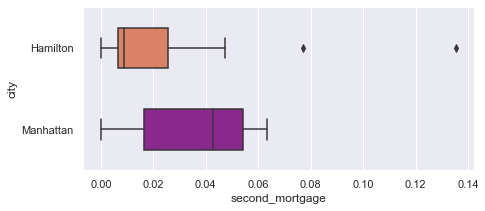

In [21]:
# Plotting the same for second mortgage
# Outliers are present in hamilton

plt.figure(figsize = (7, 3))
sns.boxplot(data = box_city, x = 'second_mortgage', y = 'city', width = 0.5, palette = "plasma_r")
plt.show()

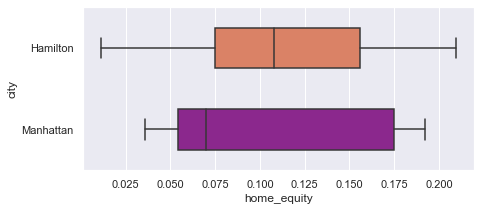

In [22]:
# Plotting the same for home quity

plt.figure(figsize = (7, 3))
sns.boxplot(data = box_city, x = 'home_equity', y = 'city', width = 0.5, palette = "plasma_r")
plt.show()

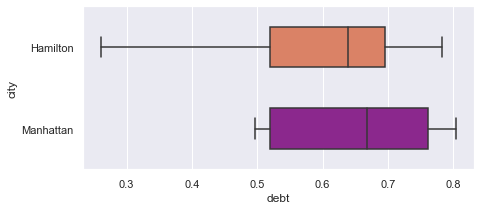

In [23]:
# Plotting the same for debt

plt.figure(figsize = (7, 3))
sns.boxplot(data = box_city, x = 'debt', y = 'city', width = 0.5, palette = "plasma_r")
plt.show()

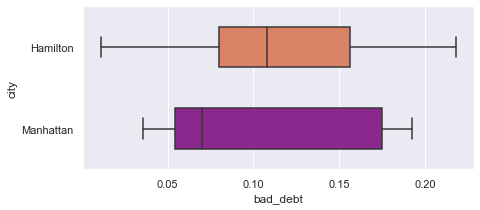

In [24]:
# Plotting the same for bad_debt
# We can clearly notice from all of the plots that manhattan has higher metrics than hamilton

plt.figure(figsize = (7, 3))
sns.boxplot(data = box_city, x = 'bad_debt', y = 'city', width = 0.5, palette = "plasma_r")
plt.show()

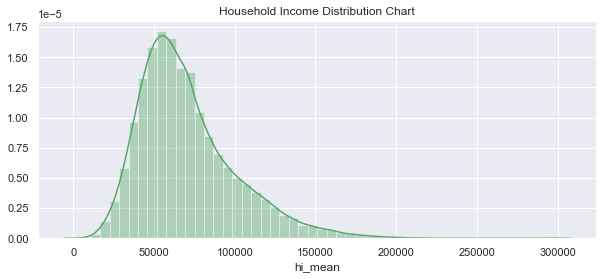

In [25]:
# Creating an income distribution chart for family income, house hold income, and remaining income

plt.figure(figsize = (10, 4))
sns.distplot(train['hi_mean'], color = "g")
plt.title('Household Income Distribution Chart')
plt.show()

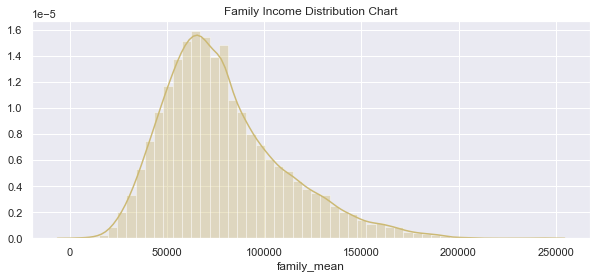

In [26]:
plt.figure(figsize = (10, 4))
sns.distplot(train['family_mean'], color = "y")
plt.title('Family Income Distribution Chart')
plt.show()

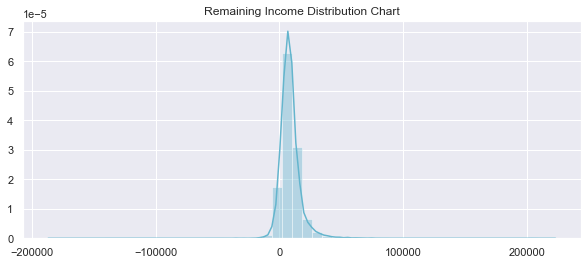

In [27]:
# Remaining income is family mean income subtracted by mean household income
# From all the charts whe can clearly notice normal distibution in income

plt.figure(figsize = (10, 4))
sns.distplot(train['family_mean'] - train['hi_mean'], color = "c")
plt.title('Remaining Income Distribution Chart')
plt.show()

<Figure size 3600x1800 with 0 Axes>

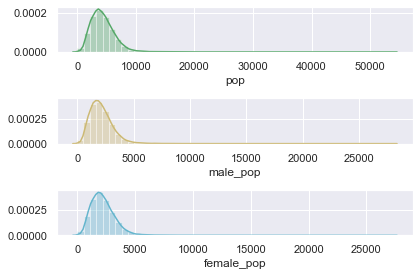

In [28]:
# Looking into population density and age
# Visualizing the same for population
# Data is skewed to the right side; positive skewness

plt.figure(figsize = (50, 25))
fig,(ax1,ax2,ax3) = plt.subplots(3, 1)
sns.distplot(train['pop'], ax = ax1, color = "g")
sns.distplot(train['male_pop'], ax = ax2, color = "y")
sns.distplot(train['female_pop'], ax = ax3, color = "c")
plt.subplots_adjust(wspace = 0.8, hspace = 0.8)
plt.tight_layout()
plt.show()

<Figure size 3600x1800 with 0 Axes>

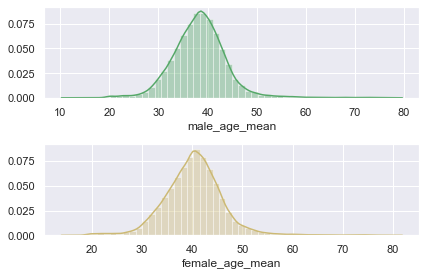

In [29]:
# Visualizing the same for age
# Data is normally distributed

plt.figure(figsize = (50, 25))
fig,(ax1, ax2) = plt.subplots(2, 1)
sns.distplot(train['male_age_mean'], ax = ax1, color = "g")
sns.distplot(train['female_age_mean'], ax = ax2, color = "y")
plt.subplots_adjust(wspace = 0.8, hspace = 0.8)
plt.tight_layout()
plt.show()

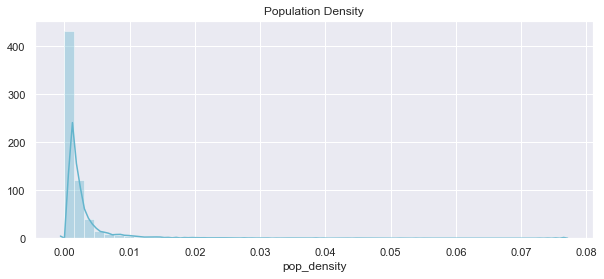

In [30]:
# Creating a new field - population density from aland and pop
# Plotting the same; very less density is noticed

train['pop_density'] = train['pop']/train['ALand']
test['pop_density'] = test['pop']/test['ALand']

plt.figure(figsize = (10, 4))
sns.distplot(train['pop_density'], color = 'c')
plt.title('Population Density')
plt.show() 

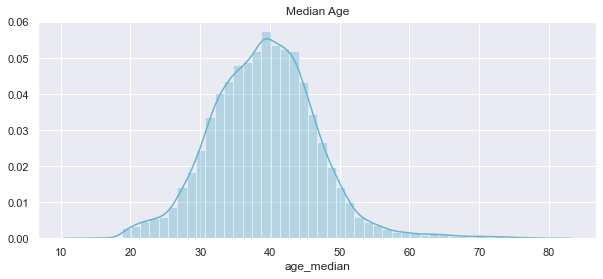

In [31]:
# Creating a new field - median age from male_age_median, female_age_median, male_pop, and female_pop
# Age of population is mostly between 20 and 60
# Majority are of age around 40 to 50
# Median age distribution follows a normal distribution
# Some right skewness is noticed

train['age_median'] = (train['male_age_median'] + train['female_age_median'])/2
test['age_median'] = (test['male_age_median'] + test['female_age_median'])/2

plt.figure(figsize = (10, 4))
sns.distplot(train['age_median'], color = 'c')
plt.title('Median Age')
plt.show()

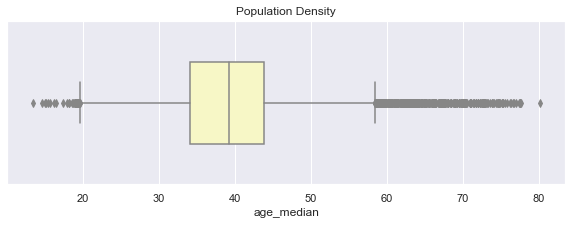

In [32]:
# Lets create a box plot for the two varibales created above

plt.figure(figsize = (10, 3))
sns.boxplot(train['age_median'], width = 0.5, palette = "Spectral" )
plt.title('Population Density')
plt.show() 

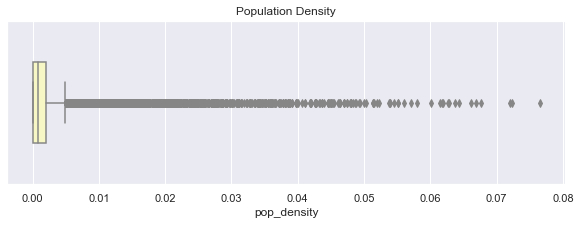

In [33]:
plt.figure(figsize = (10, 3))
sns.boxplot(train['pop_density'], width = 0.5, palette = "Spectral" )
plt.title('Population Density')
plt.show() 

In [34]:
# Creating bins for population into a new variable by selecting appropriate class interval 
# so that the no of categories(bins) don’t exceed 5 for the ease of analysis

train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [35]:
# Creating bins for population on the basis of 'very low','low','medium','high','very high'
# Using the cut function and a bin interval of 5 

train['pop_bins']= pd.cut(train['pop'], bins = 5, labels = ['very low','low','medium','high','very high'])
train[['pop','pop_bins']]

train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [36]:
# Analysing the married, separated and divorced population for these population brackets
# Grouping the married, separated and divorced population by pop_bins on the basis of count
# Determining the mean and median for the same
# In very high population groups, there are more married people and less percantage of separated/divorced couples
# In very low population groups, there are more divorced people

train.groupby(by = 'pop_bins')[['married','separated','divorced']].count()
train.groupby(by = 'pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

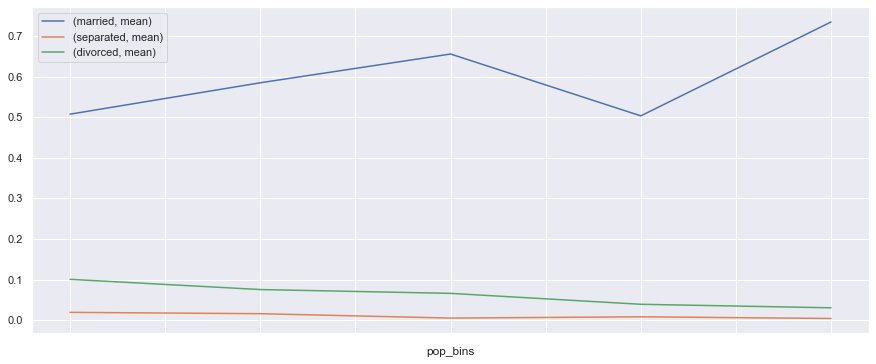

In [37]:
# Lets visualize the same for easy analysis
# We can't determine much from the chart below

pop_bin_married = train.groupby(by = 'pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize = (15, 6))
plt.legend(loc = 'best')
plt.show()

In [38]:
# Creating a new variable for rent as a percentage of income at an overall level, and for different states
# Grouping the mean rent on the basis of state

rent_state_mean = train.groupby(by = 'state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

mean
state                  
Alabama      774.004927
Alaska      1185.763570
Arizona     1097.753511
Arkansas     720.918575
California  1471.133857

In [39]:
# Applying the same for income on the basis of state

income_state_mean = train.groupby(by = 'state')['family_mean'].agg(["mean"])
income_state_mean.head()

mean
state                   
Alabama     67030.064213
Alaska      92136.545109
Arizona     73328.238798
Arkansas    64765.377850
California  87655.470820

In [40]:
# Calculating the rent percent of the overall income

rent_perc_of_income = rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head()

state
Alabama       0.011547
Alaska        0.012870
Arizona       0.014970
Arkansas      0.011131
California    0.016783
Name: mean, dtype: float64

In [41]:
# Overall rent as a percentage of income

sum(train['rent_mean'])/sum(train['family_mean'])

0.013358170721473864

In [42]:
# Performing correlation analysis for all the relevant variables 
# Lets look at the relevant columns

train.columns
r = train[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

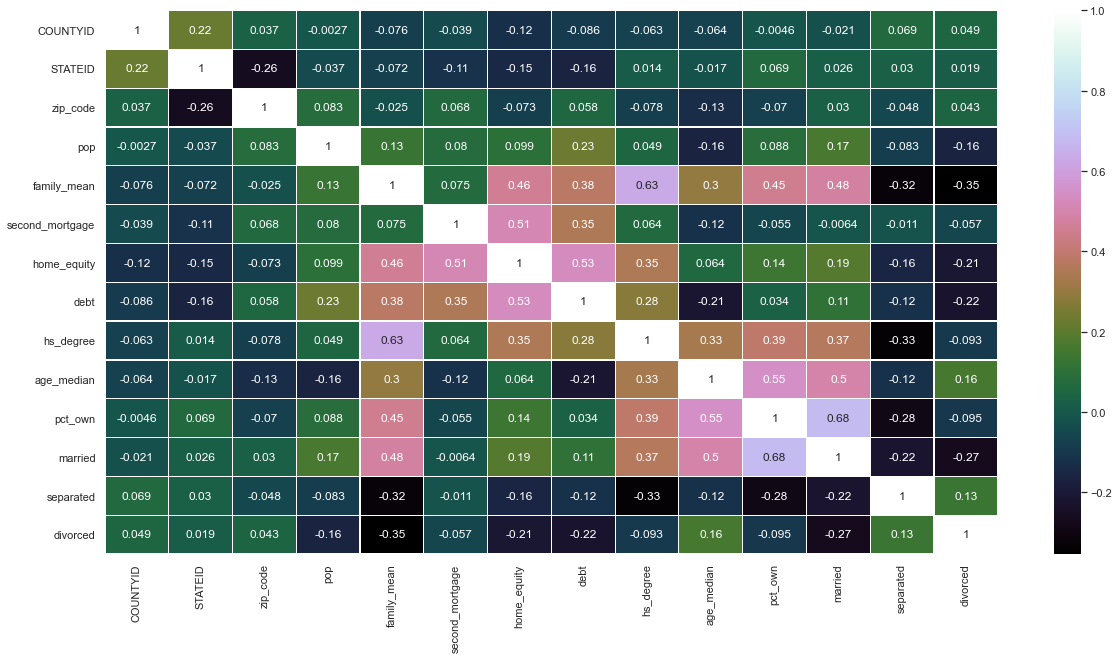

In [43]:
# There is a high positive correaltion between pop, male_pop and female_pop
# There is a high positive correlation between rent_mean,hi_mean, family_mean,hc_mean

plt.figure(figsize = (20, 10))
sns.heatmap(r, annot = True, cmap = 'cubehelix', linewidths = .20)
plt.show()

In [44]:
# Problem in hand

# The economic multivariate data has a significant number of measured variables. 
# The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
# Each variable is assumed to be dependent upon a linear combination of the common factors
# and the coefficients are known as loadings
# Each measured variable also includes a component due to independent random variability, 
# known as “specific variance” because it is specific to one variable. 
# Obtain the common factors and then plot the loadings
# Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 
# Following are the list of latent variables:Highschool graduation rates 
# • Median population age • Second mortgage statistics • Percent own • Bad debt expense

In [45]:
# Lets utilize factor analysis
# Factor analysis helps in identifying latent/hidden factors that have a significant effect on the variables
# Selecting 5 number of factors
# Excluding the obejct and category from the dataset

# Courtesy of Charles Zaiontz
# One of the main objectives of factor analysis is to reduce the number of parameters. 
# The number of parameters in the original model is equal to the number of unique elements in the covariance matrix.
# The factors which have a high eigenvalue should be retained, 
# while those with a low eigenvalue should be eliminated

# Learn more in https://www.real-statistics.com/multivariate-statistics/factor-analysis/determining-number-of-factors/#:~:text=As%20mentioned%20previously%2C%20one%20of,1)%2F2%20such%20elements.

#pip install factor_analyzer

#from sklearn.decomposition import FactorAnalysis
#from factor_analyzer import FactorAnalyzer

#fa = FactorAnalyzer(n_factors = 5)
#fa.fit_transform(train.select_dtypes(exclude = ('object','category')))
#fa.loadings_

In [46]:
# Building the data model
# Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 
# Refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. 
# This is the mean monthly mortgage and owner costs of specified geographical location. 
# Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

In [47]:
# building the dataset for modeling
# Looking for unique values in the training dataset
# Creating a dictionary for city, urban, town, CDP, village and borough
# Replacing the same variables 

train['type'].unique()
type_dict = {'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
train.replace(type_dict, inplace = True)

In [48]:
# Replicating the same on the test dataset

train['type'].unique()
test.replace(type_dict, inplace = True)
test['type'].unique()

array([4, 1, 6, 3, 5, 2], dtype=int64)

In [49]:
# Selecting the relevant feature columns for modeling

feature_cols = ['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']

In [50]:
# Predicting on the basis of mortgage mean

x_train = train[feature_cols]
y_train = train['hc_mortgage_mean']

x_test = test[feature_cols]
y_test = test['hc_mortgage_mean']

In [51]:
# Importing the metrics for predictive modeling
# Scaling the data with standard scaler
# Standardization refers to shifting each feature datapoint towards a mean on 0 and standard deviation of 1

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [53]:
linereg = LinearRegression()
linereg.fit(x_train_scaled, y_train)

LinearRegression()

In [54]:
# Making the prediction on the test set scaled
# RMSE of test > RMSE of train => OVER FITTING of the data
# RMSE of test < RMSE of train => UNDER FITTING of the data
# The closer the value of RMSE is to zero , the better is the Regression Model

y_pred = linereg.predict(x_test_scaled)
print("R2 score of linear regression model", r2_score(y_test,y_pred))
print("RMSE of linear regression model", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score of linear regression model 0.7348210754610929
RMSE of linear regression model 323.1018894984635


In [55]:
# Running the model at state level
# There are 50 sates in US
# Picking a few iDs 20, 1 , 45, 6

state = train['STATEID'].unique()
state[0:5]

array([36, 18, 72, 20,  1], dtype=int64)

In [56]:
# R2 of 60% and above has been achieved

for i in [20,1,45]:
    print("State ID -",i)
    
    x_train_nation = train[train['COUNTYID'] == i][feature_cols]
    y_train_nation = train[train['COUNTYID'] == i]['hc_mortgage_mean']
    
    x_test_nation = test[test['COUNTYID'] == i][feature_cols]
    y_test_nation = test[test['COUNTYID'] == i]['hc_mortgage_mean']
    
    x_train_scaled_nation = sc.fit_transform(x_train_nation)
    x_test_scaled_nation = sc.fit_transform(x_test_nation)
    
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation = linereg.predict(x_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID - 20
Overall R2 score of linear regression model for state, 20 : 0.604660376646181
Overall RMSE of linear regression model for state, 20 : 307.97188999314716


State ID - 1
Overall R2 score of linear regression model for state, 1 : 0.8104382475484617
Overall RMSE of linear regression model for state, 1 : 307.8275861848435


State ID - 45
Overall R2 score of linear regression model for state, 45 : 0.7887446497855252
Overall RMSE of linear regression model for state, 45 : 225.69615420724134




(array([6.000e+00, 3.000e+00, 2.900e+01, 7.670e+02, 7.823e+03, 2.716e+03,
        3.010e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2515.04284233, -1982.92661329, -1450.81038425,  -918.69415521,
         -386.57792617,   145.53830287,   677.65453191,  1209.77076095,
         1741.88698999,  2274.00321903,  2806.11944807]),
 <a list of 10 Patch objects>)

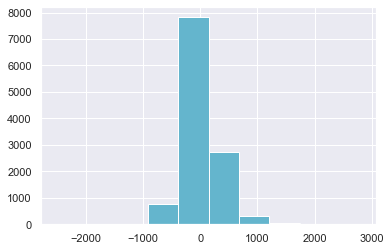

In [57]:
# Lets check if the predicted variables are normally distributed; they are

r = y_test - y_pred
r
plt.hist(r, color = 'c') 
#sns.distplot(r)

In [58]:
# Thank You :) 